<a href="https://colab.research.google.com/github/Braelin2/HW3/blob/main/ECGR5101_HW3_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/ECGR5105/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

In [ ]:
convlist =  ['diagnosis']
# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
dataset[convlist] = dataset[convlist].apply(binary_map)

In [ ]:
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

Accuracy: 0.9298245614035088
Precision: 0.9361702127659575
Recall: 0.8979591836734694
F1 Score: 0.9166666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

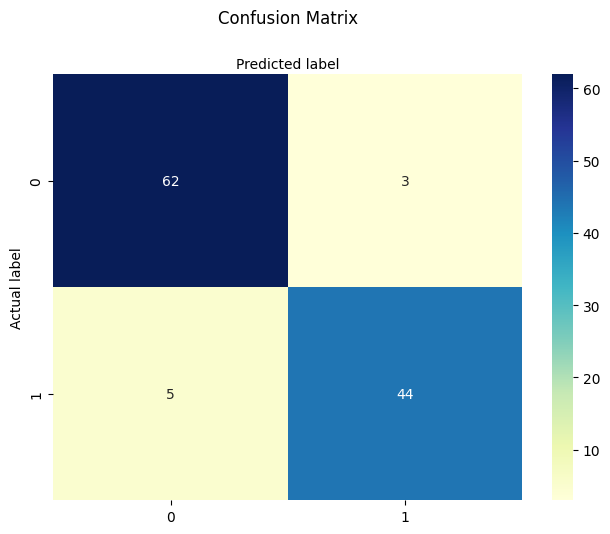

In [ ]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

classifier_naive = GaussianNB()
classifier_naive.fit(X_train,Y_train)

Prediction = classifier_naive.predict(X_test)


#Gettings the accuracy, precision, recall, and f1 score
print("Accuracy:",metrics.accuracy_score(Y_test, Prediction))
print("Precision:",metrics.precision_score(Y_test, Prediction))
print("Recall:",metrics.recall_score(Y_test, Prediction))
print("F1 Score:", metrics.f1_score(Y_test, Prediction))

#plotting confusion matrix
matrix = confusion_matrix(Y_test, Prediction)

classes =[0,1]
fig, ax = plt.subplots()
lines = np.arange(len(classes))
plt.xticks(lines, classes)
plt.yticks(lines, classes)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')